# Models On actual Data (UCi-Secom)

# Data Loading and Preprocessing

In [17]:
import pandas as pd

# Load the data
data = pd.read_csv("/kaggle/input/new-data/uci-secom.csv")  # Adjust file path if needed
data.info() # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [18]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [19]:
data.size

927664

In [20]:
data.isnull().sum().sum()

41951

In [21]:
print(data.describe())  # Summary statistics

                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

In [22]:
print(data['Pass/Fail'].value_counts())  # Check class imbalance

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [23]:
# Separate features and target
X = data.iloc[:, 1:-1]  # All columns except the first ('Time') and the last ('Pass/Fail')
y = data.iloc[:, -1]    # The target column ('Pass/Fail')


292    91.193363
293    91.193363
157    91.193363
158    91.193363
220    85.577537
         ...    
572     0.000000
573     0.000000
574     0.000000
575     0.000000
576     0.000000
Length: 590, dtype: float64


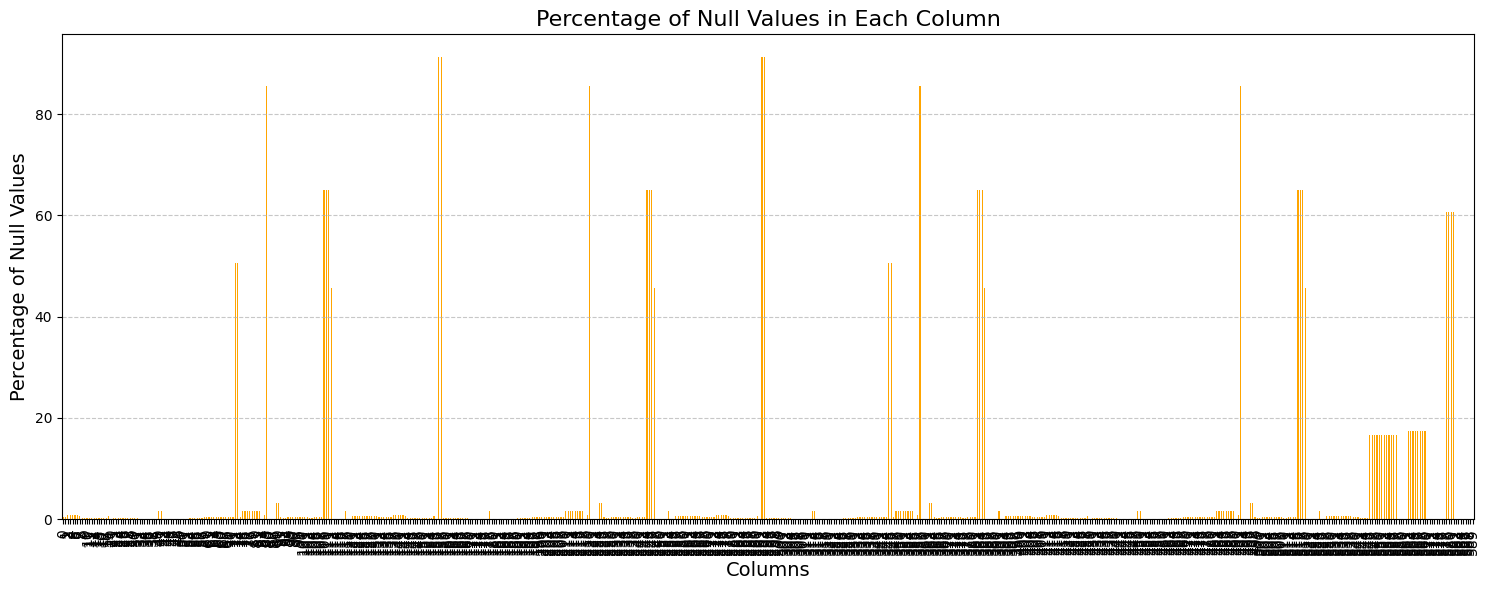

In [24]:
# Percentage of nulls in each column
null_percentage = (X.isnull().sum() / len(data)) * 100
print(null_percentage.sort_values(ascending=False))

# Visualize the null percentage
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
null_percentage.plot(kind='bar', color='orange')
plt.title("Percentage of Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Percentage of Null Values", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
# Drop columns with >50% null values
threshold = 0.5  # Set threshold to 50%
X = X.dropna(axis=1, thresh=len(data) * threshold)
print(f"Remaining columns after dropping: {data.shape[1]}")

Remaining columns after dropping: 592


In [26]:
X.fillna(X.mean(), inplace=True)

In [27]:
X.isnull().sum().sum()

0

In [28]:
y.isnull().sum().sum()

0

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1253, 562) (314, 562) (1253,) (314,)


In [30]:
from sklearn.preprocessing import StandardScaler

# Standardize the features for models like SVM and KNN
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1.**SVM**

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Initialize the SVM model
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy}")
# Detailed Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9235668789808917
SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2.**KNN**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy}")

# Detailed Classification Report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9267515923566879
KNN Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       290
           1       1.00      0.04      0.08        24

    accuracy                           0.93       314
   macro avg       0.96      0.52      0.52       314
weighted avg       0.93      0.93      0.89       314



# 3.**DTC**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc_model = DecisionTreeClassifier()

# Train the model
dtc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dtc = dtc_model.predict(X_test)

# Evaluate the model
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
print(f"DTC Accuracy: {dtc_accuracy}")

# Detailed Classification Report
print("DTC Classification Report:")
print(classification_report(y_test, y_pred_dtc))

DTC Accuracy: 0.8757961783439491
DTC Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       290
           1       0.06      0.04      0.05        24

    accuracy                           0.88       314
   macro avg       0.49      0.49      0.49       314
weighted avg       0.86      0.88      0.87       314



# 4.**CNN**

In [38]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Adjust y_train and y_test labels from {-1, 1} to {0, 1}
y_train = (y_train + 1) // 2
y_test = (y_test + 1) // 2

# Continue with scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict and generate classification report
y_pred = cnn_model.predict(X_test_cnn)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels
print(classification_report(y_test, y_pred))


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732295322.597505     119 service.cc:145] XLA service 0x78c450007670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732295322.597554     119 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732295322.597558     119 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


36/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9171 - loss: 0.4051

I0000 00:00:1732295326.368034     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9187 - loss: 0.3936 - val_accuracy: 0.9236 - val_loss: 0.2752
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9319 - loss: 0.2614 - val_accuracy: 0.9236 - val_loss: 0.2747
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9393 - loss: 0.2295 - val_accuracy: 0.9236 - val_loss: 0.2704
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9278 - loss: 0.2630 - val_accuracy: 0.9236 - val_loss: 0.2720
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9329 - loss: 0.2410 - val_accuracy: 0.9236 - val_loss: 0.2692
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9245 - loss: 0.2637 - val_accuracy: 0.9236 - val_loss: 0.2824
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9356 - loss: 0.2439 - val_accuracy: 0.9236 - val_loss: 0.2681
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9357 - loss: 0.2352 - val_accuracy: 0.9236 - val_loss: 0.2692
Ep

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5.**LSTM**

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape the data for LSTM (e.g., add a dimension for time steps)
X_train_lstm = X_train.values.reshape(-1, 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(-1, 1, X_test.shape[1])

# Define LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Accuracy: {lstm_accuracy}")


y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)  # Convert probabilities to binary classes

# Detailed Classification Report
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6973 - loss: 0.5656
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9484 - loss: 0.2088
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.2614
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9380 - loss: 0.2310
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.2062
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9313 - loss: 0.2494
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9336 - loss: 0.2444
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9422 - loss: 0.2170
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9233 - loss: 0.2683
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9308 - loss: 0.2492
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9412 - loss: 0.2227  
LSTM Accuracy: 0.9235668778419495
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
LSTM Class

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Models On SMOTE**

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming you have your dataset loaded into 'X' and 'y' (features and labels)
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [41]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
0,3030.930000,2564.000000,2187.733300,1411.126500,1.360200,100.0,97.613300,0.124200,1.500500,0.016200,...,1.676500,14.950900,0.500500,0.011800,0.003500,2.363000,0.021458,0.016475,0.005283,99.670066
1,3095.780000,2465.140000,2230.422200,1463.660600,0.829400,100.0,102.343300,0.124700,1.496600,-0.000500,...,1.106500,10.900300,0.501900,0.022300,0.005500,4.444700,0.009600,0.020100,0.006000,208.204500
2,2932.610000,2559.940000,2186.411100,1698.017200,1.510200,100.0,95.487800,0.124100,1.443600,0.004100,...,2.095200,9.272100,0.495800,0.015700,0.003900,3.174500,0.058400,0.048400,0.014800,82.860200
3,2988.720000,2479.900000,2199.033300,909.792600,1.320400,100.0,104.236700,0.121700,1.488200,-0.012400,...,1.758500,8.583100,0.499000,0.010300,0.002500,2.054400,0.020200,0.014900,0.004400,73.843200
4,3032.240000,2502.870000,2233.366700,1326.520000,1.533400,100.0,100.396700,0.123500,1.503100,-0.003100,...,1.659700,10.969800,0.480000,0.476600,0.104500,99.303200,0.020200,0.014900,0.004400,73.843200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,2891.256056,2513.926059,2168.097793,981.775638,1.418195,100.0,104.715622,0.123774,1.552411,-0.029905,...,1.650458,9.552002,0.498263,0.010402,0.002876,2.079599,0.010553,0.020961,0.007411,204.500367
2922,2904.405919,2499.924657,2230.846558,1925.486246,1.272222,100.0,97.008417,0.122395,1.609197,-0.018568,...,1.550257,13.671141,0.496885,0.016614,0.004176,3.341434,0.023137,0.013829,0.003817,60.039545
2923,3008.666837,2419.487801,2200.509551,1330.503990,1.650009,100.0,95.673969,0.120969,1.467807,0.000673,...,1.528016,22.465962,0.499748,0.011824,0.002922,2.361368,0.020937,0.017944,0.005378,85.624345
2924,2955.117437,2492.534473,2181.426498,1482.614695,1.257359,100.0,107.995805,0.124134,1.423156,0.003047,...,1.455159,11.109492,0.498395,0.018172,0.004304,3.652872,0.029382,0.019768,0.007374,69.993524


In [42]:
y_resampled

0      -1
1      -1
2       1
3      -1
4      -1
       ..
2921    1
2922    1
2923    1
2924    1
2925    1
Name: Pass/Fail, Length: 2926, dtype: int64

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:

# Adjust y_train and y_test labels from {-1, 1} to {0, 1}
y_train = (y_train + 1) // 2
y_test = (y_test + 1) // 2

# 1. Support Vector Machine (SVM)


In [45]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Test Accuracy:", svm_model.score(X_test_scaled, y_test))
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Test Accuracy: 0.9232081911262798
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       306
           1       0.88      0.97      0.92       280

    accuracy                           0.92       586
   macro avg       0.93      0.93      0.92       586
weighted avg       0.93      0.92      0.92       586



# 2. K-Nearest Neighbors (KNN)


In [46]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

# Evaluate KNN
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Test Accuracy:", knn_model.score(X_test_scaled, y_test))
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Test Accuracy: 0.7508532423208191
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.52      0.69       306
           1       0.66      1.00      0.79       280

    accuracy                           0.75       586
   macro avg       0.83      0.76      0.74       586
weighted avg       0.84      0.75      0.74       586



# 3. Decision Tree Classifier (DTC)


In [47]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_scaled, y_train)

# Evaluate Decision Tree
y_pred_dtc = dtc_model.predict(X_test_scaled)
print("Decision Tree Test Accuracy:", dtc_model.score(X_test_scaled, y_test))
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtc))

Decision Tree Test Accuracy: 0.8822525597269625
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       306
           1       0.83      0.94      0.88       280

    accuracy                           0.88       586
   macro avg       0.89      0.88      0.88       586
weighted avg       0.89      0.88      0.88       586



# 4. Convolutional Neural Network (CNN)


In [48]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate CNN
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = (y_pred_cnn > 0.5)  # Convert probabilities to binary class labels
print("CNN Test Accuracy:", test_accuracy)
print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5134 - loss: 0.6937 - val_accuracy: 0.6468 - val_loss: 0.6715
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 0.6738 - val_accuracy: 0.6092 - val_loss: 0.6290
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6756 - loss: 0.6273 - val_accuracy: 0.8020 - val_loss: 0.5755
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7653 - loss: 0.5673 - val_accuracy: 0.8072 - val_loss: 0.5281
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7790 - loss: 0.5170 - val_accuracy: 0.8242 - val_loss: 0.4717
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8090 - loss: 0.4819 - val_accuracy: 0.8396 - val_loss: 0.4370
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 0.4410 - val_accuracy: 0.8106 - val_loss: 0.4443
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8270 - loss: 0.4192 - val_accuracy: 0.8669 - val_loss: 0.3797
Ep

# 5. Long Short-Term Memory (LSTM)


In [49]:
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate LSTM
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5)  # Convert probabilities to binary class labels
print("LSTM Test Accuracy:", test_accuracy)
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.4922 - loss: 0.6935 - val_accuracy: 0.5154 - val_loss: 0.6931
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4895 - loss: 0.6933 - val_accuracy: 0.4778 - val_loss: 0.6932
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5096 - loss: 0.6927 - val_accuracy: 0.4778 - val_loss: 0.6932
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5103 - loss: 0.6930 - val_accuracy: 0.4795 - val_loss: 0.6931
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5139 - loss: 0.6933 - val_accuracy: 0.4863 - val_loss: 0.6931
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5285 - loss: 0.6927 - val_accuracy: 0.5273 - val_loss: 0.6930
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5045 - loss: 0.6927 - val_accuracy: 0.5256 - val_loss: 0.6930
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5128 - loss: 0.6928 - val_accuracy: 0.5017 - val_loss: 0

# GANs 

In [54]:
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
# Check the shapes of the resulting splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1253, 590) (314, 590) (1253,) (314,)


In [57]:
# GAN Architecture

# Define Generator Model
def build_generator(latent_dim, data_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(data_dim, activation='tanh'))
    return model

In [58]:
# Define Discriminator Model
def build_discriminator(data_dim):
    model = Sequential()
    model.add(Dense(1024, input_dim=data_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [59]:

# Define GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [60]:
# Hyperparameters
latent_dim = 100  # Latent space dimension (random noise vector)
data_dim = X_train.shape[1]  # Number of features in the dataset

In [62]:
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input

# Build models
generator = build_generator(latent_dim, data_dim)
discriminator = build_discriminator(data_dim)
gan = build_gan(generator, discriminator)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [63]:
# Compile the Discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])


In [64]:
# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

In [65]:

# Train the GAN
def train_gan(epochs, batch_size=128):
    half_batch = batch_size // 2
    for epoch in range(epochs):
        # Train the Discriminator
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_data = X_train[idx]
        real_labels = np.ones((half_batch, 1))
        
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_data = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))
        
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train the Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        
        # Print progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")


In [67]:
import numpy as np
# Train the GAN
train_gan(epochs=1000, batch_size=64)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: nan | D accuracy: 25.0] [G loss: [array(nan, dtype=float32), array(nan, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

In [68]:
noise = np.random.normal(0, 1, (1000, 100))  # Generate 1000 synthetic samples
generated_data = generator.predict(noise)

# Inverse scale to get the data back in original scale (if needed)
generated_data = scaler.inverse_transform(generated_data)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [75]:
# Combine the original data and synthetic data
augmented_data = np.vstack((X_train, generated_data))
augmented_labels = np.hstack((y_train, y_train))  # Assuming synthetic data has the same labels as real data


In [77]:
# Check the number of augmented data and labels
print("Augmented data shape:", augmented_data.shape)  # Should be (num_samples, num_features)
print("Augmented labels shape:", augmented_labels.shape)  # Should match num_samples

# If they don't match, you need to adjust either the data generation or label generation


Augmented data shape: (2253, 590)
Augmented labels shape: (2506,)


In [78]:
# Slice the labels to match the number of augmented data points
augmented_labels = augmented_labels[:augmented_data.shape[0]]

# Check the new shape
print("Sliced augmented labels shape:", augmented_labels.shape)

Sliced augmented labels shape: (2253,)


In [88]:
# Convert to a DataFrame
augmented_df = pd.DataFrame(augmented_data)

# Save the augmented dataset to a CSV file
augmented_df['Pass/Fail'] = augmented_labels  # Add labels to the dataset
augmented_df.to_csv('augmented_secom_data.csv', index=False)

print("Augmented data saved to 'augmented_secom_data.csv'")

Augmented data saved to 'augmented_secom_data.csv'


In [95]:
import pandas as pd

# Load the augmented dataset
augmented_df = pd.read_csv('augmented_secom_data.csv')

# Separate features and labels
X = augmented_df.drop(columns=['Pass/Fail'])
y = augmented_df['Pass/Fail']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Features shape: (2253, 590)
Labels shape: (2253,)


In [96]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.339531,0.608588,0.577955,0.323671,0.000844,0.0,0.565305,0.942457,0.758487,0.289166,...,0.144928,0.247605,0.931250,0.031024,0.037938,0.029163,0.220551,0.183833,0.144928,0.247605
1,0.416972,0.543719,0.505468,0.636235,0.001311,0.0,0.027423,0.968896,0.472282,0.490257,...,NaN,NaN,0.762500,0.007862,0.009728,0.007535,0.263993,0.082138,0.065217,0.088208
2,0.554958,0.549201,0.601302,0.299744,0.000036,0.0,0.467638,0.941680,0.681564,0.371785,...,NaN,NaN,0.818750,0.028262,0.026265,0.026913,0.262322,0.235984,0.231884,0.198714
3,0.425454,0.334438,0.640753,0.404605,0.000439,0.0,0.592705,0.941680,0.543833,0.278254,...,0.311594,0.197522,0.846875,0.012962,0.017510,0.012295,0.314119,0.350717,0.311594,0.197522
4,0.470633,0.466693,0.496173,0.255507,0.000554,0.0,0.449928,0.947900,0.585733,0.423227,...,0.344203,0.095024,0.803125,0.005312,0.006809,0.004937,0.545530,0.400261,0.344203,0.095024


In [97]:
X.isnull().sum().sum()

33563

In [99]:
print(augmented_df['Pass/Fail'].value_counts())  # Check class imbalance

Pass/Fail
-1    2113
 1     140
Name: count, dtype: int64


157    72.622846
158    72.622846
293    72.622846
292    72.622846
85     68.283344
         ...    
221     0.000000
156     0.000000
520     0.000000
521     0.000000
20      0.000000
Length: 590, dtype: float64


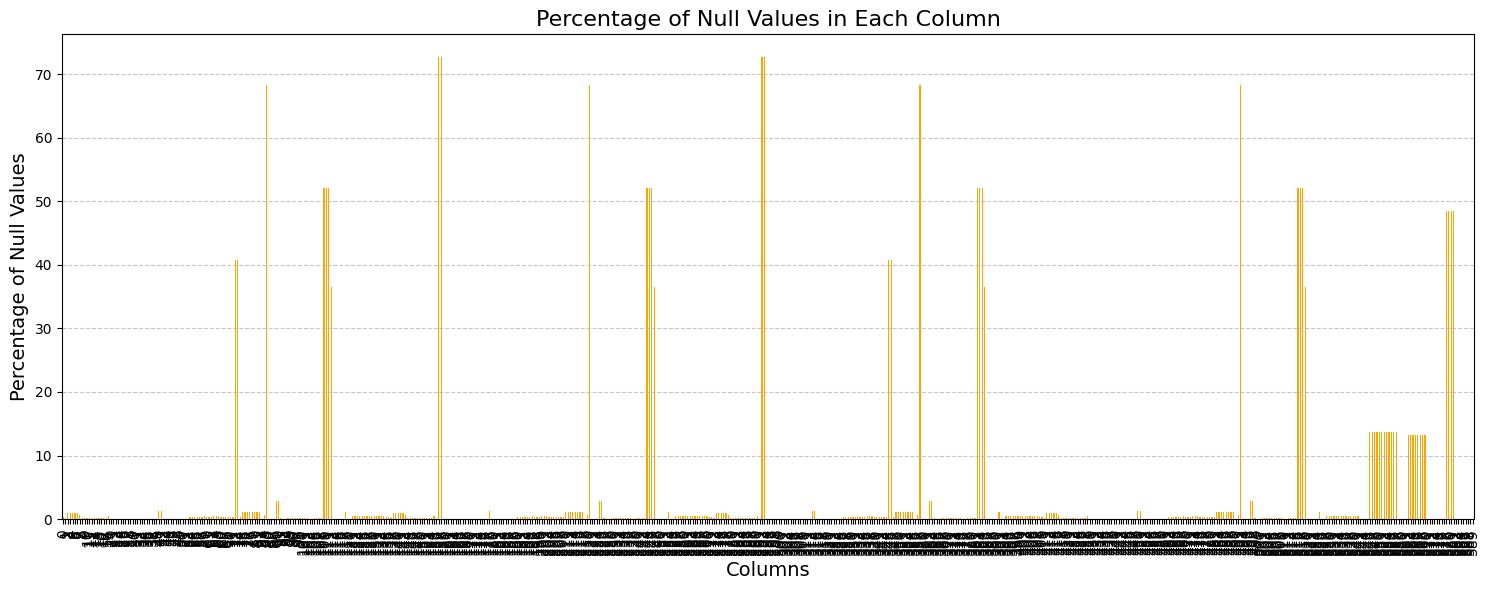

In [100]:
# Percentage of nulls in each column
null_percentage = (X.isnull().sum() / len(data)) * 100
print(null_percentage.sort_values(ascending=False))

# Visualize the null percentage
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
null_percentage.plot(kind='bar', color='orange')
plt.title("Percentage of Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Percentage of Null Values", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [101]:
# Drop columns with >50% null values
threshold = 0.5  # Set threshold to 50%
X = X.dropna(axis=1, thresh=len(data) * threshold)
print(f"Remaining columns after dropping: {data.shape[1]}")

Remaining columns after dropping: 592


In [102]:
X.fillna(X.mean(), inplace=True)

In [103]:
X.isnull().sum().sum()

0

In [104]:
y.isnull().sum().sum()

0

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to the range [0, 1]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 1. SVM Model

In [106]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.9113082039911308
              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       428
           1       0.05      0.04      0.05        23

    accuracy                           0.91       451
   macro avg       0.50      0.50      0.50       451
weighted avg       0.90      0.91      0.91       451



# 2. KNN Model

In [107]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 0.9490022172949002
              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       428
           1       0.00      0.00      0.00        23

    accuracy                           0.95       451
   macro avg       0.47      0.50      0.49       451
weighted avg       0.90      0.95      0.92       451



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Decision Tree Classifier (DTC)

In [108]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_dtc = dtc_model.predict(X_test_scaled)
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))


Decision Tree Model Accuracy: 0.8824833702882483
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       428
           1       0.03      0.04      0.04        23

    accuracy                           0.88       451
   macro avg       0.49      0.49      0.49       451
weighted avg       0.90      0.88      0.89       451



# 4. CNN Model

In [112]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Adjust y_train and y_test labels from {-1, 1} to {0, 1}
y_train = (y_train + 1) // 2
y_test = (y_test + 1) // 2

# Continue with scaling the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN input
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=15, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predict and generate classification report
y_pred = cnn_model.predict(X_test_cnn)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels
print(classification_report(y_test, y_pred))


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8984 - loss: 0.3382 - val_accuracy: 0.9490 - val_loss: 0.2061
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9366 - loss: 0.2442 - val_accuracy: 0.9490 - val_loss: 0.2048
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.2363 - val_accuracy: 0.9490 - val_loss: 0.2113
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9382 - loss: 0.2354 - val_accuracy: 0.9490 - val_loss: 0.2139
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9423 - loss: 0.2322 - val_accuracy: 0.9490 - val_loss: 0.2043
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9363 - loss: 0.2399 - val_accuracy: 0.9490 - val_loss: 0.2141
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9404 - loss: 0.2394 - val_accuracy: 0.9490 - val_loss: 0.2044
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9286 - loss: 0.2651 - val_accuracy: 0.9490 - val_loss: 0.2054
Ep

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5. LSTM Model

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data to be compatible with LSTM input shape (samples, timesteps, 1)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32)

# Predict and evaluate the model
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5)  # Convert probabilities to binary labels
print("LSTM Model Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8651 - loss: nan
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9336 - loss: nan
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9332 - loss: nan
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9375 - loss: nan
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9364 - loss: nan
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9309 - loss: nan
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9493 - loss: nan
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9327 - loss: nan
Epoch 9/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9360 - loss: nan
Epoch 10/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9353 - loss: nan
Epoch 11/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9293 - loss: nan
Epoch 12/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9287 - loss: nan
Epoch 13/15
57/57 ━━━━━━

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
